## Importing libraries

In [25]:
# Cell 1 — Importing Libraries for Week 2 (Regression Analysis)
import kagglehub     # to download House Prices dataset
import shutil
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# sklearn modules for regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats

# optional: prettier seaborn style
sns.set(style="whitegrid", context="notebook")

print("Libraries imported successfully!")


Libraries imported successfully!


## Dataset Downloading

In [26]:
# Cell 2 — Downloading House Prices dataset (KaggleHub)

# Downloading the dataset
#cached_path = kagglehub.dataset_download("competitions/house-prices-advanced-regression-techniques")


#print("Cached path:", cached_path)

# Choosing my folder to store the dataset
#target_folder = r"D:\AD_Lab\datasets\house_prices"
#target_folder = r"C:\Desktop\AD_Lab\datasets\house_prices"

# Create folder if it doesn't exist
#os.makedirs(target_folder, exist_ok=True)

# Copy all files from cache → my selected folder
'''
for file_name in os.listdir(cached_path):
    src = os.path.join(cached_path, file_name)
    dst = os.path.join(target_folder, file_name)
    shutil.copy(src, dst)
'''
#print("Dataset copied to:", target_folder)


'\nfor file_name in os.listdir(cached_path):\n    src = os.path.join(cached_path, file_name)\n    dst = os.path.join(target_folder, file_name)\n    shutil.copy(src, dst)\n'

## Load the dataset + show head + info

In [27]:
# Cell 3 — Load the House Prices train dataset

# DATA_PATH = r"D:\AD_Lab\datasets\house_prices\train.csv"
DATA_PATH = r"C:\Users\KIIT0001\Desktop\AD_Lab\datasets\house_prices\train.csv"
df = pd.read_csv(DATA_PATH)

print("Dataset loaded successfully!")
print("\nShape:", df.shape)

print("\nFirst 5 rows:")
display(df.head())

print("\nDataset Info:")
print(df.info())
print("\nStatistical Summary:")
display(df.describe())

Dataset loaded successfully!

Shape: (1460, 81)

First 5 rows:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Select feature + Train/Test Split

Select feature, inspect, train/test split

Columns present: True True

Feature / Target sample:


,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


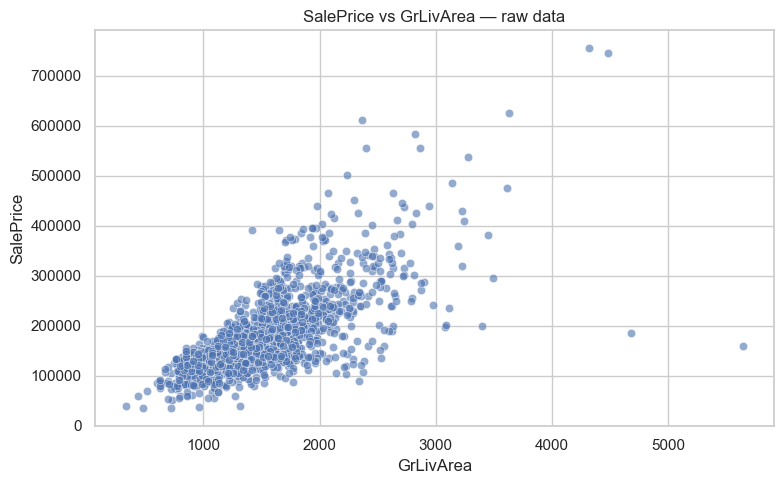


Train shape: (1095, 1) (1095,)
Test shape : (365, 1) (365,)


In [28]:

# Cell 4 — Select feature (GrLivArea), inspect, and train/test split

# Feature & target
FEATURE = "GrLivArea"
TARGET = "SalePrice"

# Quick check that columns exist
print("Columns present:", FEATURE in df.columns, TARGET in df.columns)
print("\nFeature / Target sample:")
display(df[[FEATURE, TARGET]].head())

# Quick scatter to inspect relationship
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x=FEATURE, y=TARGET, alpha=0.6)
plt.title(f"{TARGET} vs {FEATURE} — raw data")
plt.xlabel(FEATURE)
plt.ylabel(TARGET)
plt.tight_layout()
plt.show()

# Prepare X, y for modeling
X = df[[FEATURE]].copy()   # 2D dataframe for sklearn
y = df[TARGET].copy()

# Train / test split
from sklearn.model_selection import train_test_split
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=RANDOM_STATE
)

print("\nTrain shape:", X_train.shape, y_train.shape)
print("Test shape :", X_test.shape, y_test.shape)


Fit Linear Regression, evaluate, and plot regression line

Model parameters:
 Intercept: 24812.580398812337
 Coefficient (slope): 102.46754355681706

Performance:
 Train MSE: 3155876897.79
 Test  MSE: 3118447791.99
 Train R2 : 0.4802
 Test  R2 : 0.5548


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(



Saved regression plot to: C:\Users\KIIT0001\Desktop\AD_Lab\datasets\house_prices\grlivarea_saleprice_regression.png


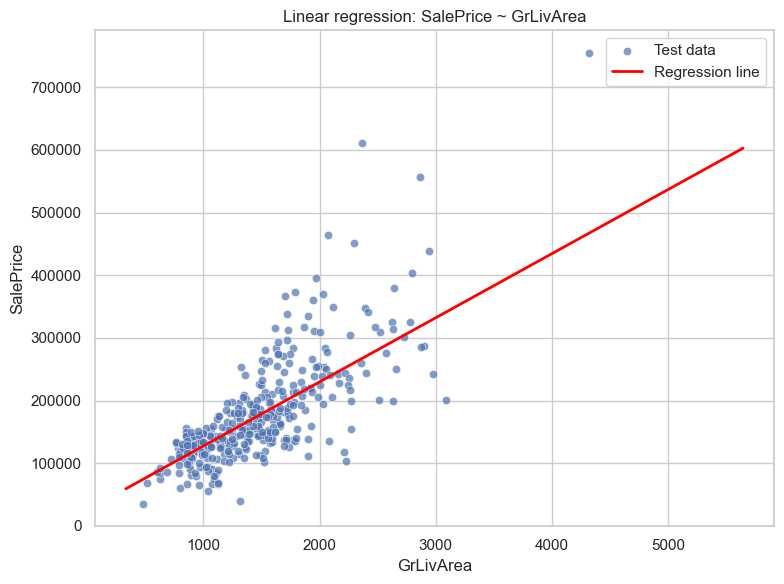

In [29]:
# Cell 5 — Fit Simple Linear Regression, evaluate (MSE, R2), and plot line

model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluation
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test  = mean_squared_error(y_test, y_test_pred)
r2_train  = r2_score(y_train, y_train_pred)
r2_test   = r2_score(y_test, y_test_pred)

print("Model parameters:")
print(" Intercept:", float(model.intercept_))
print(" Coefficient (slope):", float(model.coef_[0]))
print()
print("Performance:")
print(f" Train MSE: {mse_train:.2f}")
print(f" Test  MSE: {mse_test:.2f}")
print(f" Train R2 : {r2_train:.4f}")
print(f" Test  R2 : {r2_test:.4f}")

# Plot: scatter (test set) + regression line (over full data range)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test[FEATURE], y=y_test, label="Test data", alpha=0.7)

# For a smooth line, compute predictions on a sorted range of the feature
x_line = np.linspace(X[FEATURE].min(), X[FEATURE].max(), 200).reshape(-1, 1)
y_line = model.predict(x_line)

plt.plot(x_line, y_line, color='red', linewidth=2, label="Regression line")
plt.title(f"Linear regression: {TARGET} ~ {FEATURE}")
plt.xlabel(FEATURE)
plt.ylabel(TARGET)
plt.legend()
plt.tight_layout()

# Save plot (optional)
# OUT_DIR = r"D:\AD_Lab\datasets\house_prices"
OUT_DIR = r"C:\Users\KIIT0001\Desktop\AD_Lab\datasets\house_prices"
os.makedirs(OUT_DIR, exist_ok=True)
plot_path = os.path.join(OUT_DIR, "grlivarea_saleprice_regression.png")
plt.savefig(plot_path, dpi=150)
print("\nSaved regression plot to:", plot_path)

plt.show()


## Simple Linear Regression 2: SalePrice ~ TotalBsmtSF

Model 2 parameters:
 Intercept: 71103.76623314098
 Coefficient: 104.27255803927784

Performance (SalePrice ~ TotalBsmtSF):
 Train MSE: 3931151322.47
 Test  MSE: 3972902411.79
 Train R2 : 0.3525
 Test  R2 : 0.4329


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


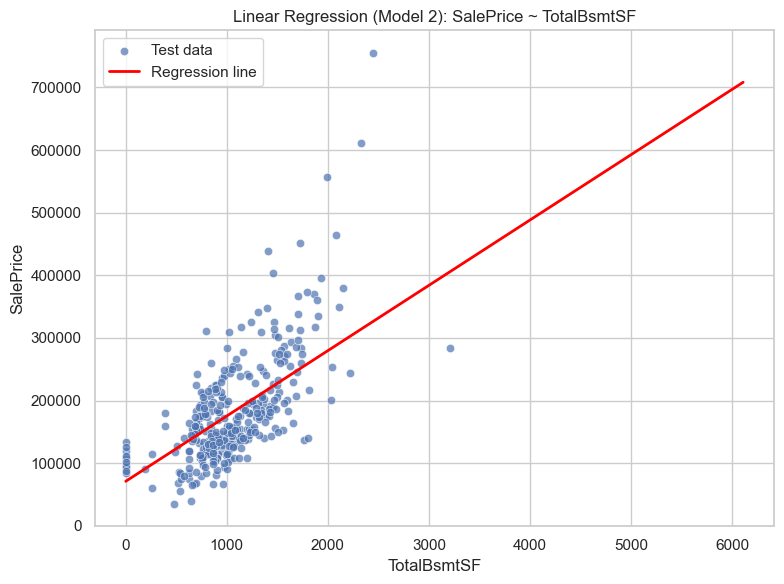

In [30]:
# Cell 6 — Second Simple Linear Regression (SalePrice ~ TotalBsmtSF)

FEATURE2 = "TotalBsmtSF"
TARGET = "SalePrice"

# Prepare data
X2 = df[[FEATURE2]]
y2 = df[TARGET]

# Train-test split
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.25, random_state=42
)

# Train model
model2 = LinearRegression()
model2.fit(X2_train, y2_train)

# Predictions
y2_train_pred = model2.predict(X2_train)
y2_test_pred  = model2.predict(X2_test)

# Metrics
mse2_train = mean_squared_error(y2_train, y2_train_pred)
mse2_test  = mean_squared_error(y2_test,  y2_test_pred)
r2_2_train = r2_score(y2_train, y2_train_pred)
r2_2_test  = r2_score(y2_test,  y2_test_pred)

print("Model 2 parameters:")
print(" Intercept:", float(model2.intercept_))
print(" Coefficient:", float(model2.coef_[0]))
print()
print("Performance (SalePrice ~ TotalBsmtSF):")
print(f" Train MSE: {mse2_train:.2f}")
print(f" Test  MSE: {mse2_test:.2f}")
print(f" Train R2 : {r2_2_train:.4f}")
print(f" Test  R2 : {r2_2_test:.4f}")

# Visualize model 2 regression line
plt.figure(figsize=(8,6))
sns.scatterplot(x=X2_test[FEATURE2], y=y2_test, label="Test data", alpha=0.7)

# smooth line
x_line2 = np.linspace(X2[FEATURE2].min(), X2[FEATURE2].max(), 200).reshape(-1,1)
y_line2 = model2.predict(x_line2)

plt.plot(x_line2, y_line2, color='red', linewidth=2, label="Regression line")
plt.title(f"Linear Regression (Model 2): {TARGET} ~ {FEATURE2}")
plt.xlabel(FEATURE2)
plt.ylabel(TARGET)
plt.legend()
plt.tight_layout()

# OUT_DIR = r"D:\AD_Lab\datasets\house_prices"
OUT_DIR = r"C:\Users\KIIT0001\Desktop\AD_Lab\datasets\house_prices"
os.makedirs(OUT_DIR, exist_ok=True)
plt.savefig(os.path.join(OUT_DIR, "totalbsmt_saleprice_regression.png"), dpi=150)

plt.show()

 ## Residuals Plot for Both Models

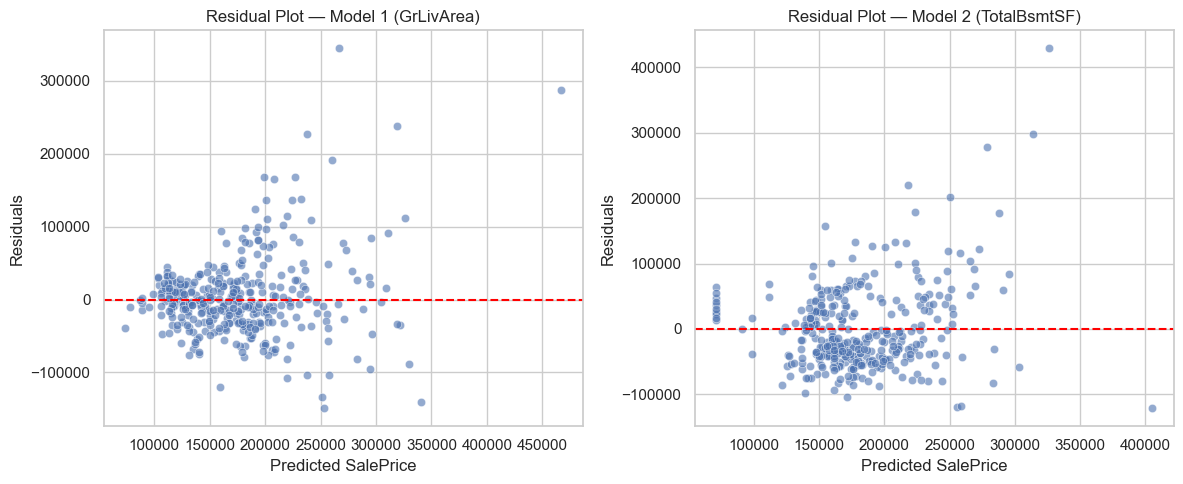

In [31]:
# Cell 7 — Residuals Plots for Both Models

# Residuals for Model 1
res1 = y_test - y_test_pred

# Residuals for Model 2
res2 = y2_test - y2_test_pred

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(x=y_test_pred, y=res1, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot — Model 1 (GrLivArea)")
plt.xlabel("Predicted SalePrice")
plt.ylabel("Residuals")

plt.subplot(1,2,2)
sns.scatterplot(x=y2_test_pred, y=res2, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot — Model 2 (TotalBsmtSF)")
plt.xlabel("Predicted SalePrice")
plt.ylabel("Residuals")

plt.tight_layout()
plt.show()


## Q–Q Plot (Normality Check) for Residuals

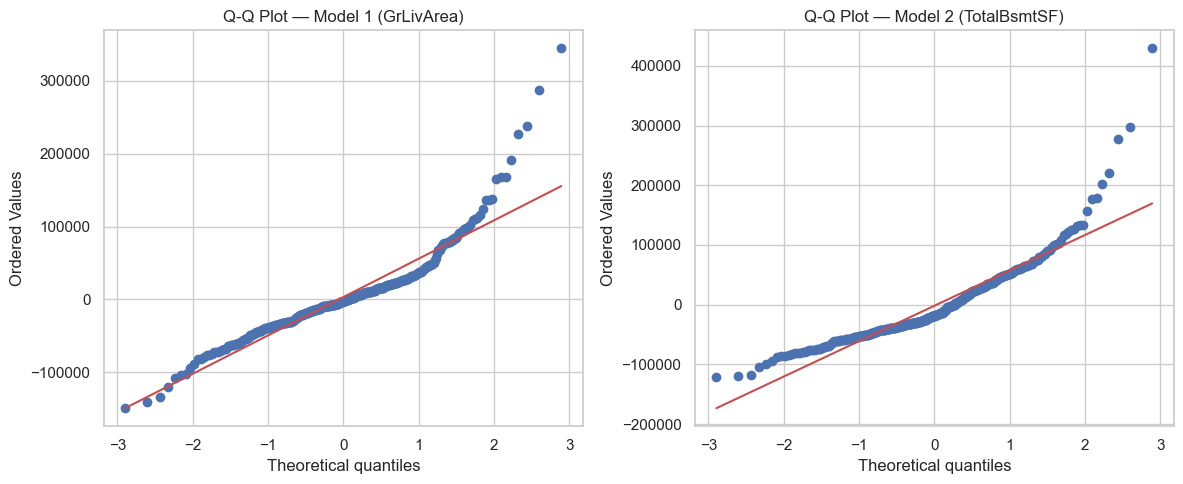

In [32]:
# Cell 8 — Q-Q Plots for Both Models



plt.figure(figsize=(12,5))

# QQ for Model 1
plt.subplot(1,2,1)
stats.probplot(res1, dist="norm", plot=plt)
plt.title("Q-Q Plot — Model 1 (GrLivArea)")

# QQ for Model 2
plt.subplot(1,2,2)
stats.probplot(res2, dist="norm", plot=plt)
plt.title("Q-Q Plot — Model 2 (TotalBsmtSF)")

plt.tight_layout()
plt.show()
